In [1]:
# import nltk
# nltk.download("twitter_samples")

In [2]:
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import twitter_samples

corpus = twitter_samples.strings("positive_tweets.json")
corpus = corpus + twitter_samples.strings("negative_tweets.json")

stopwords = nltk.corpus.stopwords.words("english")
lemmatizer = nltk.WordNetLemmatizer()


def simple_preprocessing(text):
    text = text.lower()
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[\n\t]", " ", text)
    text = re.sub(r" +", " ", text)
    text = re.sub(r"[^a-z ]", "", text)

    tokens = nltk.TweetTokenizer().tokenize(text)
    tokens = [token for token in tokens if token not in stopwords and len(token) >= 3]
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmas)


corpus = [simple_preprocessing(text) for text in corpus]
corpus = [text for text in corpus if len(text) > 6]  # don't want random no-word posts
corpus = list(set(corpus))

In [3]:
corpus[:10]

['didnt hahaha wish',
 'dont ignore please birthday july could follow present',
 'let partyin pant gross',
 'one approve recognized fanbase bailona',
 'stream awful lately choppy terrible point staying wait video anyway',
 'fucking great fuck think le',
 'answer fan sleep',
 'standing cool',
 'shoe store serf sushi shop shoeshi shop idea change world',
 'jummah mubarik recite durood pak much thank']

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray()[0:3])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
X.shape

(8389, 10703)

In [6]:
import numpy as np
np.random.seed(0)

N_TOPICS = 5
svd = TruncatedSVD(n_components=N_TOPICS, random_state=0)
latent_semantic_analysis = svd.fit_transform(X)

terms = vectorizer.get_feature_names_out()
N_TERMS = 5
for i, comp in enumerate(svd.components_):
    terms_in_comp = zip(terms, comp)
    sorted_terms = sorted(terms_in_comp, key=lambda x:x[1], reverse=True)[:N_TERMS]
    print("Topic "+str(i)+": ")
    print("|".join([t for t, _ in sorted_terms]))
    print(" ")

Topic 0: 
thanks|day|good|dont|like
 
Topic 1: 
thanks|follow|please|great|following
 
Topic 2: 
follow|please|back|want|dont
 
Topic 3: 
miss|much|thank|love|day
 
Topic 4: 
please|love|follow|day|good
 


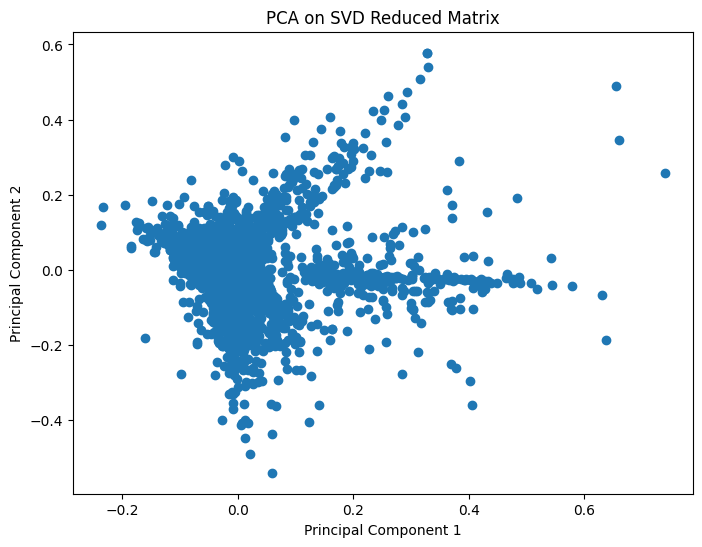

In [7]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(latent_semantic_analysis)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on SVD Reduced Matrix')
plt.show()


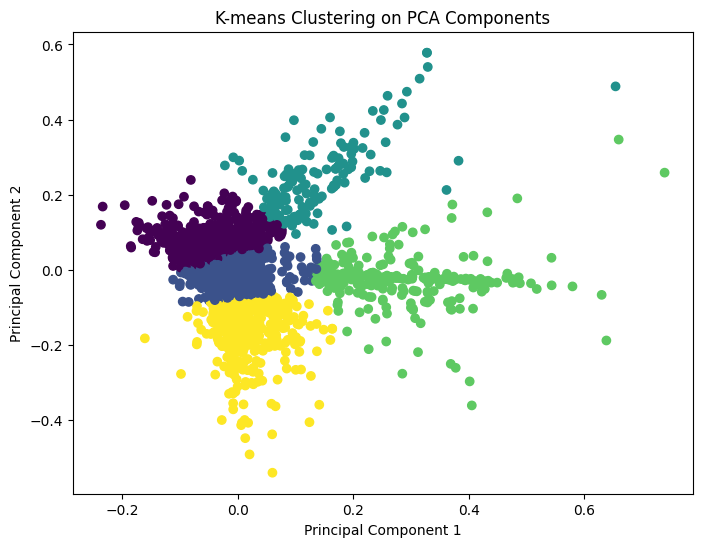

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=N_TOPICS, random_state=0)
kmeans.fit(pca_result)

# Get the cluster assignments
cluster_assignments = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_assignments)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA Components')
plt.show()


In [13]:
# inspect data from each cluster
for i in range(N_TOPICS):
    print(f"Cluster {i}")
    cluster_indices = np.where(cluster_assignments == i)[0]
    for j in cluster_indices[:5]:
        print(corpus[j])
    print("\n\n")

Cluster 0
usually front back squat
dont love methey know need
dear person please study embarrassing urself entropy work evolution
fell asleep like cant fall asleep two hour
ghost bae love wuppertal tagsforlikesapp instagood smile follow cute photooftheday



Cluster 1
didnt hahaha wish
let partyin pant gross
one approve recognized fanbase bailona
stream awful lately choppy terrible point staying wait video anyway
answer fan sleep



Cluster 2
dont ignore please birthday july could follow present
please tweet something sad cheer please
paper town please
hey check picture think notice follow please
please sponsor love would mean much begging please notice



Cluster 3
yes keep coming list someone else mentioned persona ill try thanks
thanks long
thanks amazing birthday cake delicious didnt want share haha
thanks following telecom happy friday
thanks retweets cool weekend



Cluster 4
fucking great fuck think le
finding good conference hotel london tricky small
look good outfit
good night